In [3]:
import pandas as pd


In [4]:
df=pd.read_csv('spam_NUS_1.csv',encoding='latin-1')
df.head()
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


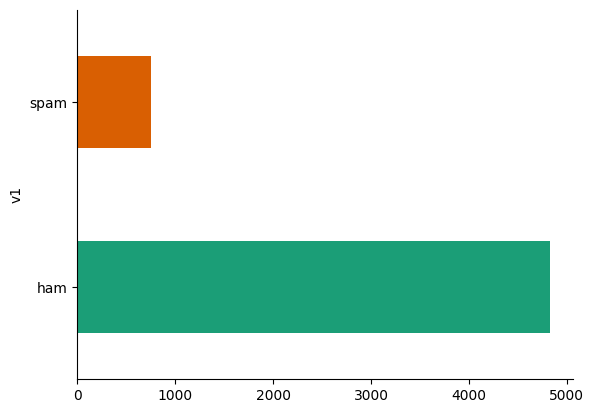

In [5]:

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum()]
    filtered_tokens = [w for w in lemmas if not w in stop_words]
    return " ".join(filtered_tokens)

df['v2_processed'] = df['v2'].apply(preprocess_text)
print(df[['v2', 'v2_processed']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        v2_processed  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['v2_processed'])

tfidf_array = tfidf_matrix.toarray()

# Adding the TF-IDF vectors as new columns to the DataFrame
for i in range(tfidf_matrix.shape[1]):
  df[f'tfidf_{i}'] = tfidf_array[:,i]

print(df.head())

Streaming output truncated to the last 5000 lines.
<ipython-input-7-2f828b819462>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tfidf_{i}'] = tfidf_array[:,i]
<ipython-input-7-2f828b819462>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tfidf_{i}'] = tfidf_array[:,i]
<ipython-input-7-2f828b819462>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

     v1                                                 v2  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                        v2_processed  tfidf_0  tfidf_1  \
0  go jurong point crazy available bugis n great ...      0.0      0.0   
1                            ok lar joking wif u oni      0.0      0.0   
2  free entry 2 wkly comp win fa cup final tkts 2...      0.0      0.0   
3                u dun say early hor u c already say      0.0      0.0   
4                nah think go usf life around though      0.0      0.0   

   tfidf_2  tfidf_3  tfidf_4  tfidf_5  tfidf_6  ...  tfidf_7511  tfidf_7512  \
0      0.0      0.0      0.0      0.0      0.0  ...         0.0         0.0   
1      0.0      0.0     

<ipython-input-7-2f828b819462>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tfidf_{i}'] = tfidf_array[:,i]
<ipython-input-7-2f828b819462>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tfidf_{i}'] = tfidf_array[:,i]
<ipython-input-7-2f828b819462>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [8]:
df.columns

Index(['v1', 'v2', 'v2_processed', 'tfidf_0', 'tfidf_1', 'tfidf_2', 'tfidf_3',
       'tfidf_4', 'tfidf_5', 'tfidf_6',
       ...
       'tfidf_7511', 'tfidf_7512', 'tfidf_7513', 'tfidf_7514', 'tfidf_7515',
       'tfidf_7516', 'tfidf_7517', 'tfidf_7518', 'tfidf_7519', 'tfidf_7520'],
      dtype='object', length=7524)

In [9]:
df['v1'] = df['v1'].astype(str)
y = df['v1'].map({'ham': 0, 'spam': 1}).astype(int)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['v1', 'v2', 'v2_processed'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.9695067264573991
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.79      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



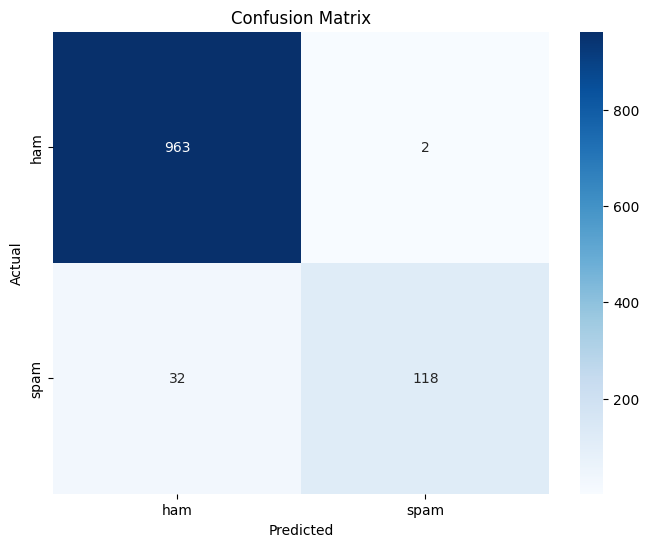

Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



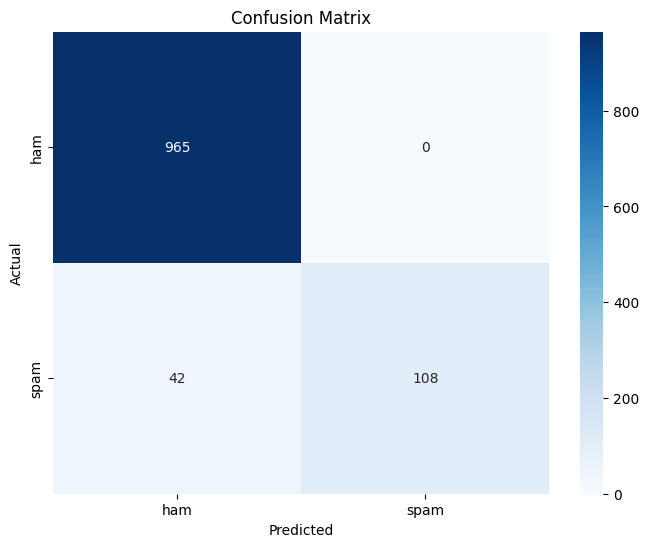

Accuracy: 0.9730941704035875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



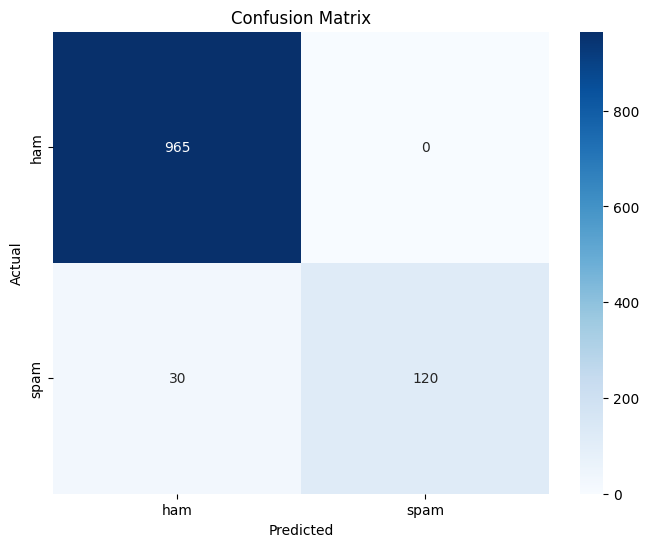

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_model(model_name, X_train, y_train):
      if model_name == 'svm':
          model = SVC()
      elif model_name == 'multinomial_nb':
          model = MultinomialNB()
      elif model_name == 'random_forest':
          model = RandomForestClassifier(n_estimators=100, random_state=42)
      else:
          raise ValueError("Invalid model name. Choose from 'svm', 'multinomial_nb', or 'random_forest'.")

      model.fit(X_train, y_train)
      return model


def predict_and_plot(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage (assuming X_train, y_train, X_test, y_test are defined as in your previous code)
svm_model = train_model('svm', X_train, y_train)
predict_and_plot(svm_model, X_test, y_test)

nb_model = train_model('multinomial_nb', X_train, y_train)
predict_and_plot(nb_model, X_test, y_test)

rf_model = train_model('random_forest', X_train, y_train)
predict_and_plot(rf_model, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 53s 366ms/step - accuracy: 0.8503 - loss: 0.4315 - val_accuracy: 0.8565 - val_loss: 0.4117
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 78s 371ms/step - accuracy: 0.8655 - loss: 0.3988 - val_accuracy: 0.8565 - val_loss: 0.4128
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 80s 359ms/step - accuracy: 0.8666 - loss: 0.3963 - val_accuracy: 0.8565 - val_loss: 0.4131
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 83s 365ms/step - accuracy: 0.8658 - loss: 0.3996 - val_accuracy: 0.8565 - val_loss: 0.4142
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 83s 371ms/step - accuracy: 0.8668 - loss: 0.3937 - val_accuracy: 0.8565 - val_loss: 0.4113
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


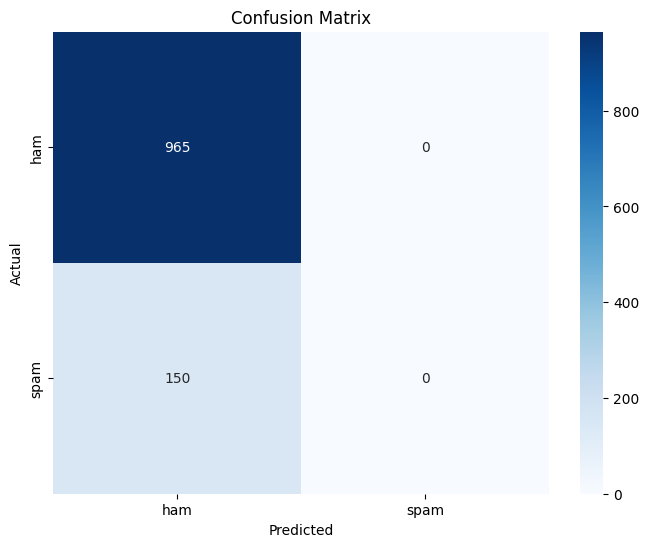

In [13]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout
# Convert target variable to numerical labels (0 and 1)
y_train = pd.factorize(y_train)[0]  # Convert to numerical labels
y_test = pd.factorize(y_test)[0]  # Convert to numerical labels


# Create the Bi-LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=200))
model.add(Bidirectional(LSTM(25)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()